In [59]:
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy
from itertools import product


In [60]:
x = np.array([random.uniform(0, 1) for k in range(300)])
y = np.array([random.uniform(0, 1) for k in range(300)])
points = [(x[i], y[i]) for i in range(300)]

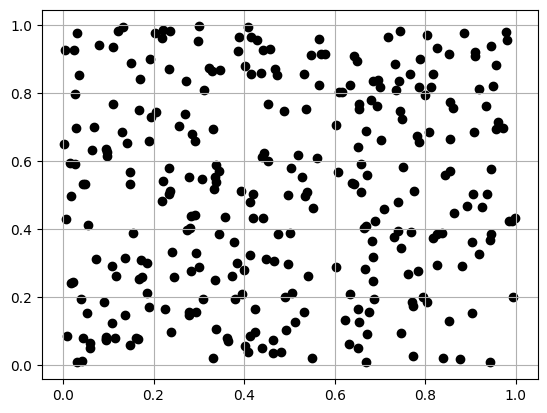

In [61]:
[plt.scatter(x[i], y[i], c="black") for i in range(300)]
plt.grid()
plt.show()

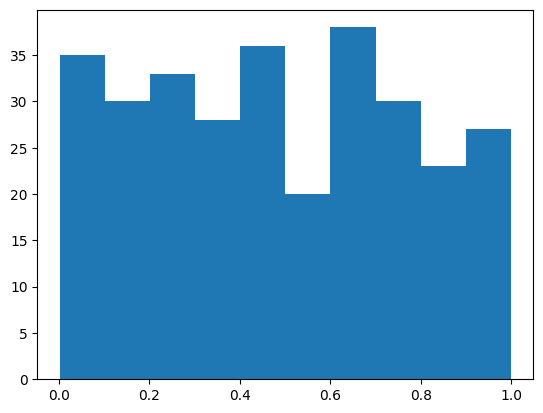

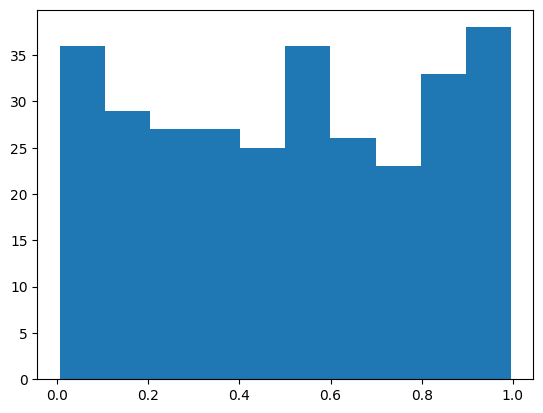

[35. 30. 33. 28. 36. 20. 38. 30. 23. 27.]
[0.00290865 0.10248791 0.20206717 0.30164643 0.40122568 0.50080494
 0.6003842  0.69996345 0.79954271 0.89912197 0.99870123]
<BarContainer object of 10 artists>


In [62]:
nx, binsx, patchesx = plt.hist(x, 10)
plt.show()
ny, binsy, patchesy = plt.hist(y, 10)
plt.show()
print(nx)
print(binsx)
print(patchesx)

In [72]:
def MI(x, y):
    cumul_MI = 0
    H = np.histogram2d(x, y, [10, 10])[0]
    for i,j in product(range(10), range(10)):
        if (pxy := H[i][j]) == 0:
            continue
        px, py = [sum(H[i]), sum((H.T)[j])]
        cumul_MI += pxy * np.log( pxy / (px * py) )
    return cumul_MI
MI(x, y)

-1668.9909631145463

Generate 300 different values for MI and plot in a histogram:

In [73]:
MI_data = []
for i in range(300):
    x = np.array([random.uniform(0, 1) for k in range(300)])
    y = np.array([random.uniform(0, 1) for k in range(300)])
    MI_data.append(MI(x,y))

print(MI_data)

[-1680.1216855798236, -1665.5681589179094, -1653.5008044897738, -1665.3953705709807, -1662.232975809681, -1670.8511433327637, -1669.9499894836476, -1674.8597933371768, -1665.4871966935245, -1665.6235991847054, -1669.4951382918866, -1660.5701522660977, -1655.2982272270185, -1665.0515426904335, -1667.9945495955676, -1670.5067748456997, -1663.3152321972836, -1666.8906687803385, -1674.4251360524293, -1648.27024895125, -1664.5596019515567, -1669.454013822353, -1680.9309755538068, -1657.9117748126887, -1668.8610275169217, -1664.6718750989917, -1668.7837502529294, -1662.2711888367273, -1671.2987103050896, -1672.3581010634664, -1670.1462340838373, -1669.3934952718103, -1681.1861274901264, -1670.8362754730376, -1672.6368253713117, -1653.8618990881907, -1661.322871459545, -1671.9130383098425, -1655.0134526480583, -1675.5045334314786, -1669.437688013424, -1659.693514884043, -1670.008426070896, -1676.850627347719, -1673.112576443309, -1664.3138874802426, -1647.1912706897838, -1666.2730238608783, -